In [1]:
from report_funcs import *

$\LARGE{\textbf{MTMW14 Assignment 2}}$ 


$\large{\textbf{Student ID}: \mathbf{31811900}}$ 

## Introduction
In this project, we used the Stommel model to represent a wind-driven circulation in a closed ocean basin, with the fluid is assumed to be incompressible with a free surface and a solid lower boundary. The vertical pressure gradient of the fluid is also assumed to be in hydrostatic balance. 

The model uses the shallow water equations, linearised about a resting state, with the addition of linear drag, with a coefficient, $\gamma = 10^{-6}s^{-1}$ which models the momentum loss due to friction at the ocean floor. Wind stress is modelled as
\begin{equation}
\mathbf{\tau} = 
\begin{pmatrix}
    \tau_x \\
    \tau_y 
\end{pmatrix} = \tau_0
\begin{pmatrix}
    -\cos(\frac{\pi y}{L}) \\
    0
\end{pmatrix}
\end{equation}
where $\tau_0 = 0.2Nm^{-2}$. This simulates the mid-latitude westerlies in the upper half of the domain, and the easterly trade winds in the lower half of the domain. In the model, the fluid is of a uniform density of $\rho = 1000kgm^{-3}$, the gravitational constant, $g$, is $10ms^{-2}$ and the coriolis parameter is approximated using a $\beta$-plane, with
\begin{equation}
    f = f_0 +\beta y
\end{equation}
where $f_0 = 10^{-4}s^{-1}$ and $\beta = 10^{-11}m^{-1}s^{-1}$. 
The height of the fluid, $h$, is expressed as
\begin{equation}
    h = H +\eta
\end{equation}
where H is the constant resting height, and $\eta$ is the surface elevation, and $H >> \eta$.

The form of the shallow water equations used is thus
\begin{equation}
    \frac{\partial \eta}{\partial t} + H\nabla\cdot\mathbf{V}= 0
    \label{mass}
\end{equation}
\begin{equation}
    \frac{\partial\mathbf{V}}{\partial t} + (f_0+\beta y) \mathbf{\hat{k}} \times \mathbf{V} = -g\nabla\eta - \gamma\mathbf{V} + \frac{\mathbf{\tau}}{\rho H}
    \label{momentum}
\end{equation}
where Equation \ref{mass} conserves mass while Equation \ref{momentum} conserves momentum. 


## Task A Derivations + Task B Drawing
The model is intended to support Kelvin, Rossby and inertia gravity waves. Of the three types of waves, inertia gravity waves have the greatest velocity, $U$, of about 100 $ms^{-1}$ in one direction. While these waves are not likely to be spawned by our initial condition of a flat height, $\eta$ field, they could be spawned by other phenomenon during the integration in the model. We are not expecting to observe any waves in any steady-state solution, since in the steady-state, $\frac{\partial\eta}{\partial t} = 0$, and thus $\frac{\partial \mathbf{V}}{\partial t} = 0$. 


The Rossby radius of deformation was calculated to be $10^6m$ using
\begin{equation}
    R_D = \frac{\sqrt{gH}}{f_0}
\end{equation}
where $g$ is the gravitational constant, $H$ is the resting depth of the fluid, 1000m, and $f_0$ is the coriolis parameter in the middle of the model domain,  $10^{-4}$.

From Stommel (1948), the width of the strongest region of the western boundary current is less than 100km. In order to ensure that the waves are resolved in this region, I chose $d = \frac{100km}{4} = 25km$. 

Since $d<<R_D$, a high-resolution grid is needed. I chose the Arakawa-C grid, as the dispersion relationship is closest to the analytical relationship. The Arakawa-C grid also has the advantage of needed interpolation only for the coriolis term. The staggered grid is illustrated in Figure 1, with the indices corresponding to those used in the code. No-normal flow boundary conditions were used for $u$ and $v$, the zonal and meridional components of velocity respectively. No boundary conditions were defined for $\eta$, as $\eta$ is not defined on the boundaries.


Using the 2D CFL criterion, I calculated the maximum timestep, $\Delta t$ that can be used, using
\begin{equation}
    \Delta t \le \frac{d}{U\sqrt{2}} = 176.8s
\end{equation}
To begin, the Forward-Backward (FB) time scheme (Matsuno 1965) was used. The model domain is a square $L\times L$ domain, with $x$ and $y$ varying from $0$ to $L$, with $L = 10^6m$

A $\Delta t$ of $160s$ was chosen, as a $\Delta t$ too close to the CFL minimum lead to instabilities in model, due to the oscillatory nature of the Foward-Backward time scheme (See Appendix). 




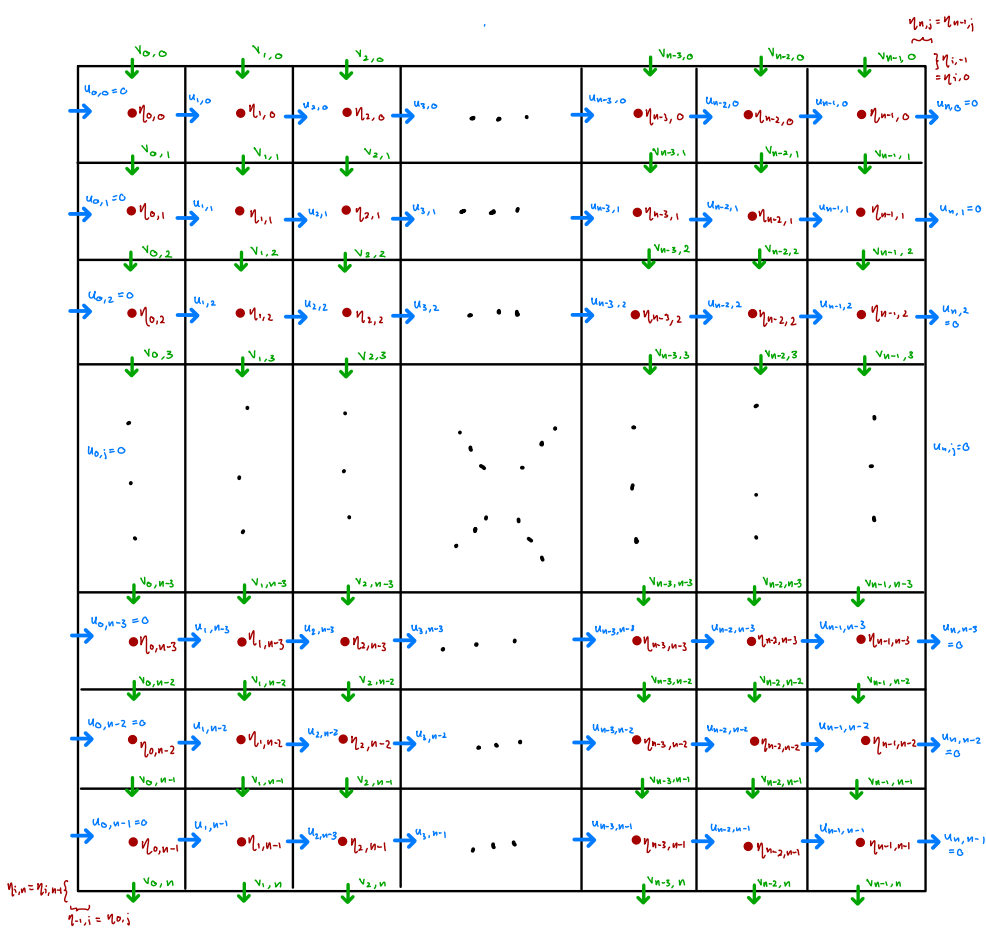

Figure 1: Illustration of the Arakawa C grid variable stagger used in the model.

## Analytical Solutions

The analytical solution of the equations used in the model was derived by Mushgrave (1985) for a steady-state (Figure 2). The analytical elevation is determined up to an unknown constant of integration, $\eta_0 = \eta (x = 0, y = \frac{L}{2})$. This unknown constant was taken from the final $\eta(0, \frac{L}{2})$ in the model so that the model solution could be compared to the analytical solution, to judge the accuracy of the model. Since $\eta$ on the C-grid is not located on the boundary, second order lagrangian interpolation was used to extrapolate to this point.

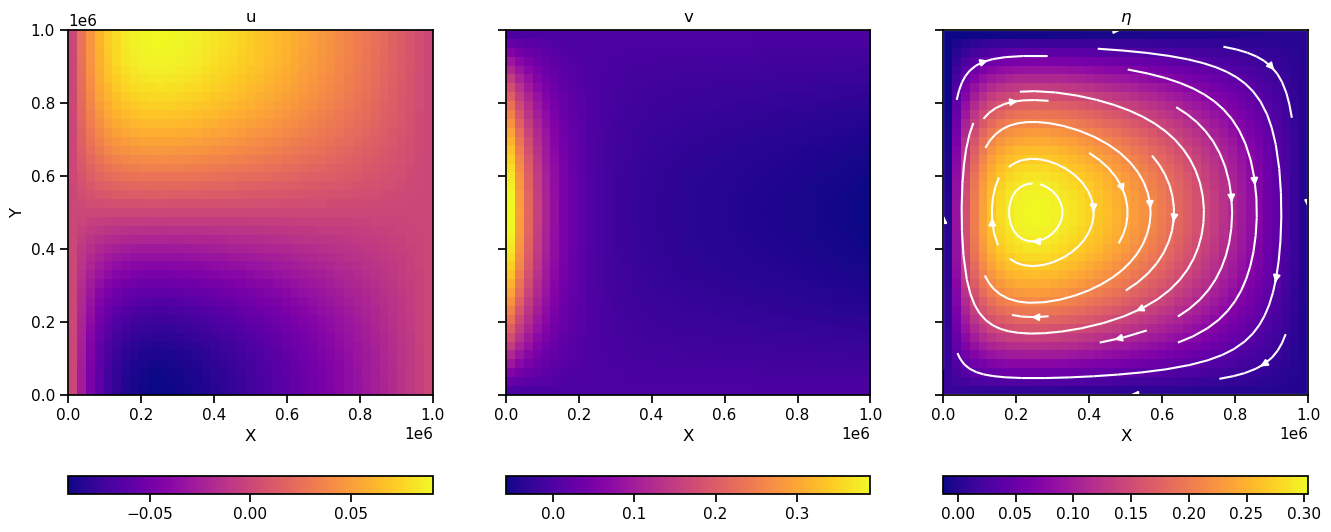

In [2]:
plot_analytical(1e6, 25e3)

Figure 2: Analytical solution for $u$, $v$ and $\eta$ with $\eta_0=0$.

The solution for $u$ is positive in the northern half of the domain and negative in the southern half, with the greatest magnitudes of $u$ at the northern and southern boundaries above and below the centre of the gyre. The westerly winds where $y > \frac{L}{2}$ drag the flow east, resulting in positive $u$, while the easterly winds where $y < \frac{L}{2}$ result in negative $u$. The change in the sign of $u$ with $y$ coincides with the change in wind stress direction with $y$. The solution for $v$ shows a large northward current at the western boundary, also known as a western boundary current. Thi western boundary current balances the southward transport in the sverdrup interior. This has to be a western boundary current as it is the only way to balance the vorticity produced as a result of the wind stress with the vorticity loss as a result of friction at the boundary (Tailleux 2024). The solution for $\eta$ shows a positive surface height that is greatest in the middle of the gyre. The location coincides with the regions where $\frac{\partial u}{\partial x}$ and $\frac{\partial v}{\partial y}$ are greatest, following from Equation \ref{mass}. From the streamlines on the $\eta$ plot, the solutions for $u$ and $v$ combine to show a zonally asymmetric clockwise gyre, which is anticylonic in the northern hemisphere ($f >0)$. 

## Task D: Forward Backward Scheme

###  1 Day

The model was run for one day to check for stability, and to ensure that the model is working as expected. $u$ at the southern boundary, $v$ at the western boundary, and $\eta$ in the middle of the gyre (in the y-direction) were plotted to investigate the profiles of the variables (Figure 3). The $\eta$ field was also plotted, with the streamlines overlayed.

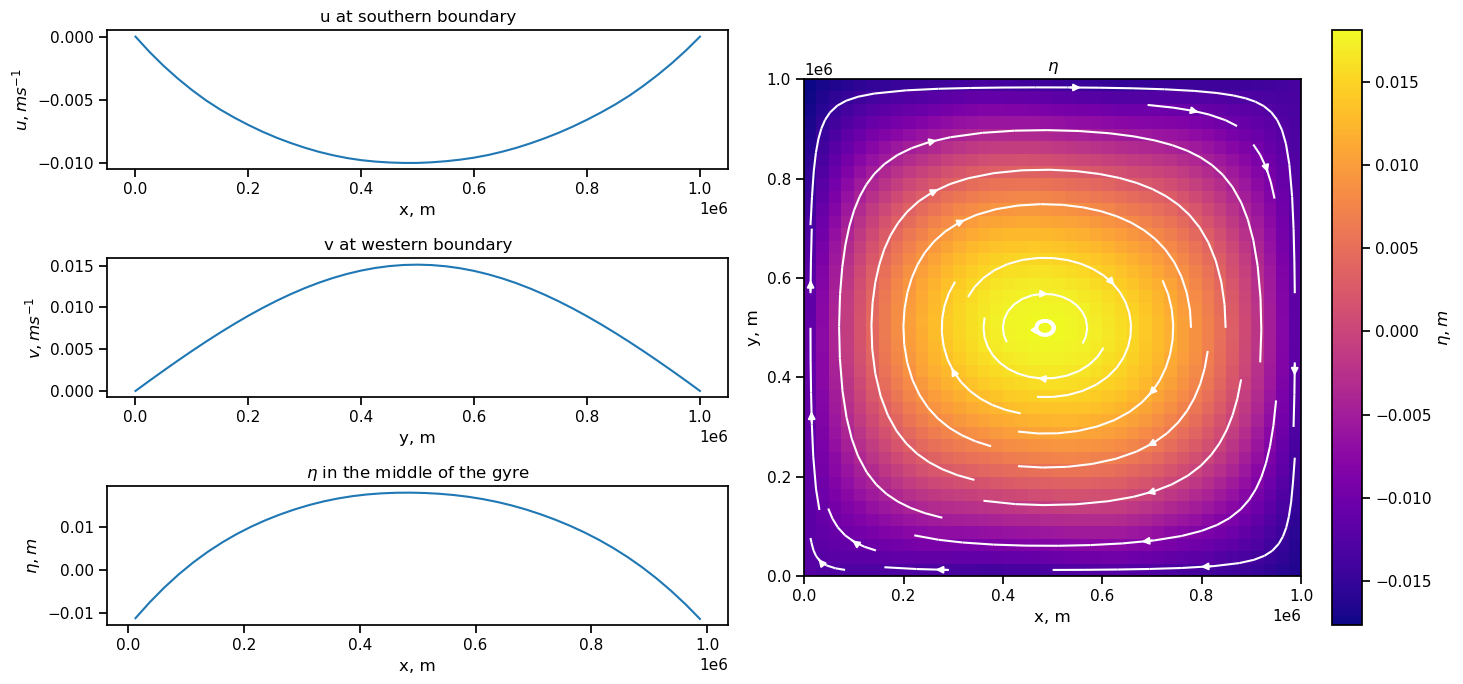

In [3]:
FB_1day()

Figure 3: The model was run using the Semi-Lagrangian method for 1 day, with $d = 25km$ and $\Delta = 160s$. Left: Profiles of $u$, $v$ and $\eta$ at the southern boundary, western boundary and in the middle of the gyre respectively. Right: 2D plot of $\eta$ and the streamlines plotted over show that a clockwise gyre is forming,

After running the model to 1 day, $u$ at southern boundary is negative, while $v$ at the western boundary is positive, suggesting that a clockwise gyre is forming as a result of the clockwise torque exerted on the fluid. As a result of the 'no normal flow' at the boundaries implemented, $u$ and $v$ are 0 at the edges of the plot, with magnitude with distance from the edge such that it is greatest in the centre of the domain. The profiles of $u$ and $v$ plotted are symmetrical with respect to the centre of the domain in the x and y directions respectively. $\eta$ in the middle of the gyre is also symmetrical about $x = \frac{L}{2}$, with magnitude greatest at $x = \frac{L}{2}$. From the $\eta$ field plotted, $\eta$ appears to be symmetrical about the centre of the domain in both x and y directions, with a positive height anomaly in the centre, and negative height anomaly on the boudaries. This is due to the clockwise torque resulting in flow toward the centre of the domain. This would result in downwelling in the ocean, but since our model comprises of only one layer, it results in a positive height anomaly at this location. The streamlines show a zonally and meridionally symmetric gyre with clockwise, anticyclonic flow, but no western boundary current is observed. This is due to the short time that the model was run for. Since it started from a state of rest, it takes time to generate a gyre, and a longer time for this gyre to develop a western boundary current.

### Steady State

The total energy perturbtion of the model from the resting ocean (initial conditions) can be calculated using
\begin{equation}
    E(v, u, \eta) = \int\limits^L_0\int\limits^L_0\frac{1}{2}\rho(H(u^2+v^2) + g\eta^2)dxdy.
\end{equation}
Since all $u$ and $v$ defined on the boundaries are 0, only the interior points are included in the calculation, and we can thus take $dxdy = d^2$ for each grid point, making the calculation straightforward. 

Steady-state reached in 20814 timesteps,                   corresponding to 38.5 days


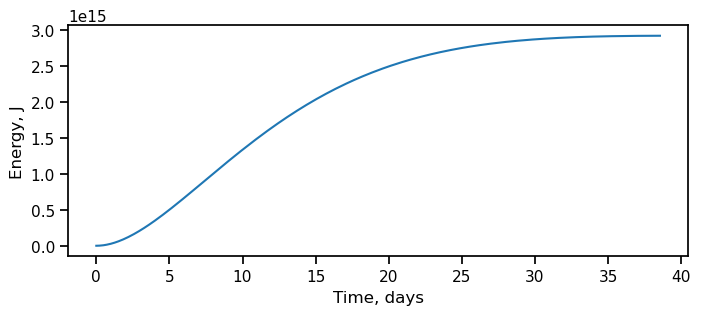

In [4]:
steadystate_energy()

Figure 4: Time series of total energy of the perturbation from the resting ocean for $\Delta t = 160$ and $d = 25km$. The energy increases before plateauing into a steady state, at about 39 days. 

The model was run and total energy pertubration calculated at each timestep until the difference in energy between subsequent timesteps was less than $1J$, indicating a steady state (Figure 4). This occured at 20982 timesteps, corresponding to 38.9 days. From Figure 4, the energy increases slowly at the beginning, then speeds up, before tapering off into the steady state. Since energy is not increasing exponentially, we can conclude that our model is stable for the parameters chosen above. To ensure that the model was in steady-state, it was run for additional day to reach 40 days. The profiles of $u$ at the southern boundary, $v$ at the western boundary, and $\eta$ in the middle of the the gyre were plotted, in addition to the analytical solutions (Figure 5). The $\eta$ field with the streamlines overlayed was also plotted. 

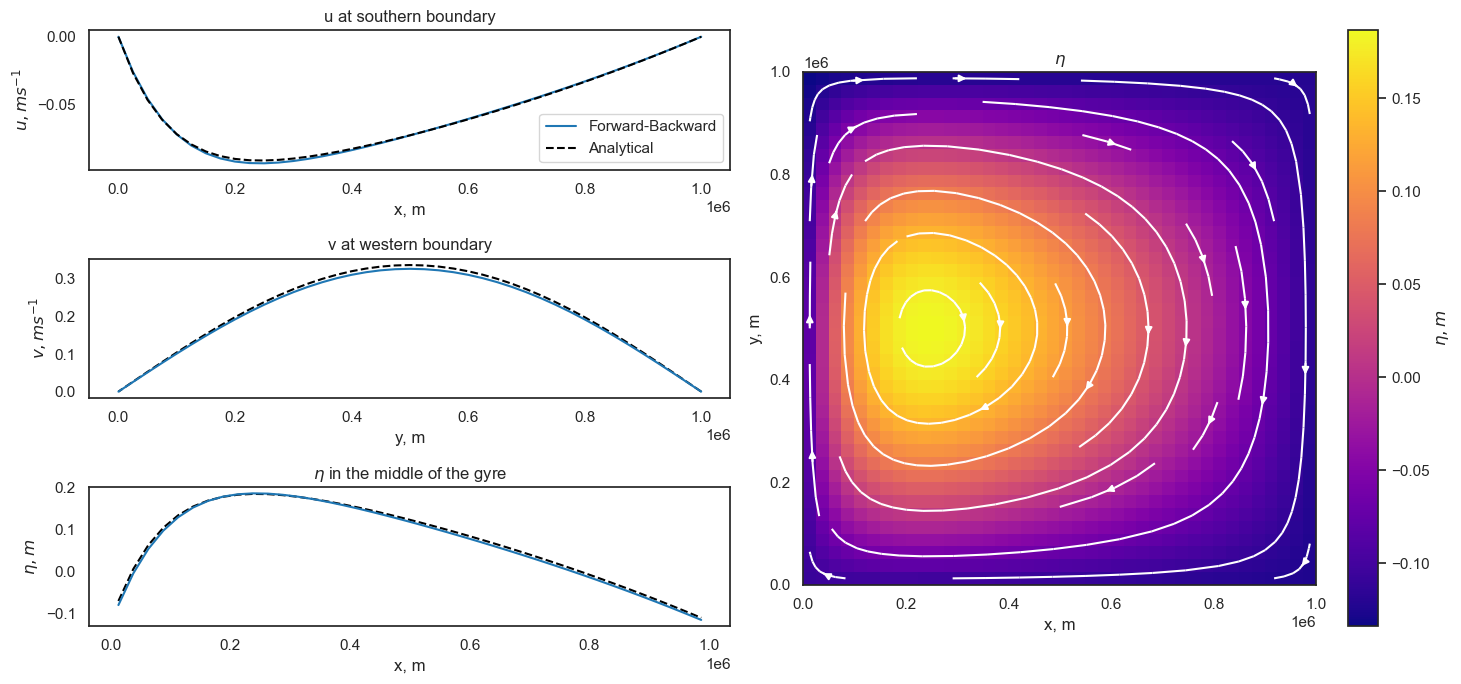

In [21]:
long = FB_steadystate()

Figure 5: The model was run using the Forward-Backward timescheme for 40 days, until it was in a steady state, with $d = 25km$ and $\Delta t= 160s$. Left: Profiles of $u$, $v$ and $\eta$ at the southern boundary, western boundary and in the middle of the gyre respectively. Right: 2D plot of $\eta$ and the streamlines plotted over. The plots show a clockwise (anti-cyclonic) gyre with a northward western boundary current.

Compared to the plots for the model after one day, the range of magnittudes of $u$ and $v$ are larger, but is approximately the same for $\eta$ . $v$ is still symmetrical in the y-direction about the centre of the domain, but $u$ and $\eta$ are skewed such that magnitudes are larger in the west. The $\eta$ field appears symmetrical about the centre of the domain in the y-direction, but is no longer symmetrical in the x-direction.

The three profiles plotted are very similar to the analytical solutions, but $u$ and $v$ deviate slightly. The maximum magnitude of $u$ at the southern boundary is slightly greater than analytical value, while maximum magnitude of $v$ at the western boundary is slightly smaller than the analytical maximum. The $\eta$ profile appears to have a greater maximum that the analytical solution, but values slightly lower than the analytical solution on either sides of the maximum. The largest deviations for each profiles occurs near or at the maximum magnitude.

### Task D3: Differences between steady state and analytical model

To compare the differences between the model and the analytical solution for the whole domain, the difference fields for each variable were calculated and plotted, such that 
\begin{equation}
    \Delta u = u - u_{analytical},
\end{equation}
with $\Delta v$ and $\Delta\eta$ being calculated the same way.

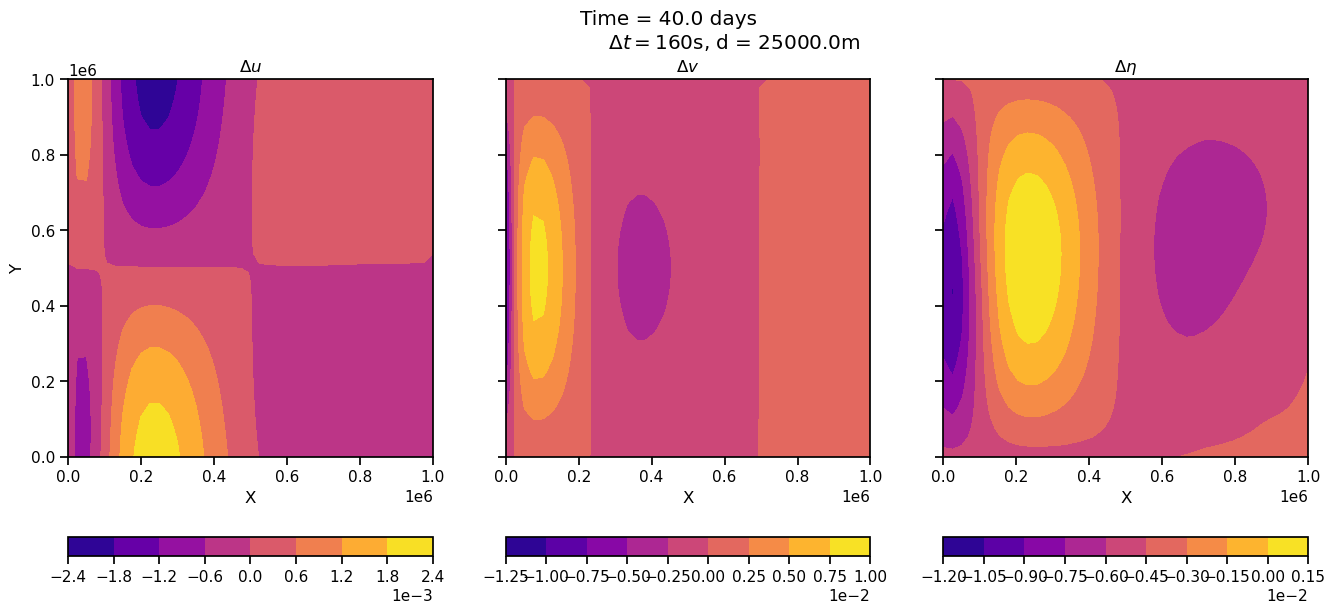

In [6]:
long.plot_solution_diff()

Figure 6: Difference fields for $u$, $v$ and $\eta$ between the Forward-Backward model solution and the analytical solution at a steady state.

From Figure 6, the largest magnitudes of $\Delta u$ are observed where magnitudes of $u$ are large, which correspond to directly north and south of the centre of the gyre. $\Delta u$ has the opposite sign of $u$ in these regions, showing that the magnitude of the model solution is smaller than the analytical solution. The greatest $\Delta v$ is observed close to the western boundary, and is positive, showing that the western boundary current produced by the model is stronger than that of the analytical solution. One possible reason for the $u$ values having a smaller magnitude could be the filtering of high frequency oscillations in the Forward-Backward time scheme (Matsuno 1995), which could damp the solution. This would affect $u$ more than $v$ in the final solution, since length scale over which $\eta$ changes in the x-direction is much smaller than in the y-direction. 


Under the FB time scheme, 
\begin{equation}
\eta^{n+1} = \eta^n - H\Delta t\left( \frac{\partial u^n}{\partial x} + \frac{\partial v^n}{\partial y}\right)
\end{equation}
From the $\Delta v$ plot, the model $\frac{\partial v}{\partial y}$ is greater than in the analytical solution at the western boundary. Since $\eta$ is dependent on $- H\Delta t\frac{\partial v^n}{\partial y}$, this results in a negative $\Delta \eta$ in this region. Similarly, the model $\frac{\partial u}{\partial x}$ is smaller than in the analytical solution in the region close to the centre of the gyre, leading to a positive $\Delta \eta$ in this region.

For all 3 variables, the regions with the largest errors correspond to regions with large gradients, suggesting that the calculations of gradients in the scheme could be causing these errors. The error are also largely symmetrical about the middle of the domain about the y axis. 

## Task E: Energy

To investigate how the accuracy of the model depends on the resolution used, the model was run to steady-state (40 days) with a range of $d$. To keep the CFL criteria chosen in Task A the same, $d$ for each model was chosen such that the ratio of $\Delta t$ to $d$ was constant. The energy from the difference fields, $E'$, in addition to the runtime, was plotted for each $\Delta t$ and $d$ pair (Figure 7). It was found that $E'$ increases with $d$ for $d > 15km$, but there does not appear to be a trend before this. This is not expected, as a higher resolution model is likely to be more accurate, as is seen in the trend for larger $d$s. One possible reason could be that the $\Delta t$ for these runs is very small, and thus a very large number of timesteps is needed. Since the FB model is damping, the large number of timesteps could have resulted in a damped, and thus less accurate model, resulting in a larger $E\prime$.

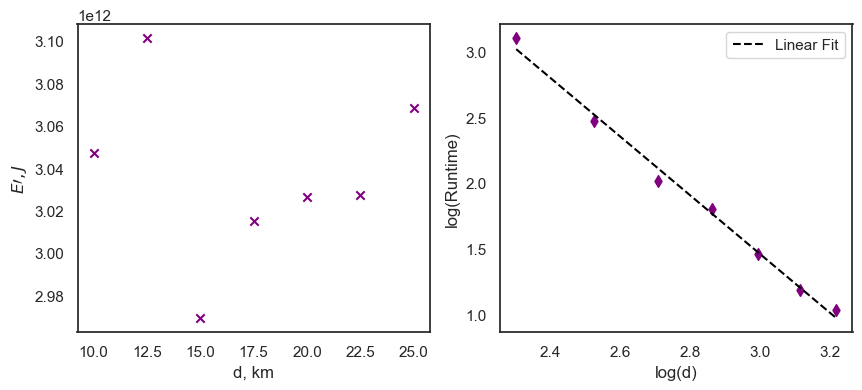

In [7]:
FB_Ediff()

Figure 7: E' and runtime for various $d$, with the $\Delta t$ to $d$ ratio held constant.

Assuming that the calculations for the grid points dominates the number of calculations, the number of calculations, which is expected to be proportional to the runtime, is expected to scale with the number of grid-points, $n_{grid}$ and the number of timesteps, $n_t$, such that 
\begin{equation}
Runtime \propto n_t\times n_{grid} \propto \frac{1}{\Delta t}\left(\frac{L}{d}\right)^2 \propto d^{-3}
\end{equation}
approximately. We would thus expect a plot of $\log(Runtime)$ against $log(d)$ to have a gradient of -3. The gradient found from Figure 7 was -2.04, which is of a lesser magnitude than expected. A possible reason for the discrepancy could be that $n$ is not exactly equal to $\left(\frac{L}{d}\right)^2$, due to the staggered grids. In addition, some calculations are not done for all grid points, such as those on the $u$ and $v$ grids that are held at 0 due to the no-normal flow condition. Non-grid calculations, such as the setting up on the arrays and the calculation of the initial parameters are also not taken into consideration in the above calculation.

## Task F:  Semi Lagrangian Method. 

Under the Semi-Lagrangian method,
\begin{equation}
\Phi^{n+1}_{i, j} \approx \Phi(\tilde{x}^n_{i,j}) + \Delta t \left(\frac{S(x_{i, j}, t^{n+1})+ S(x^{\tilde{n}}_{i, j}, t^{n})}{2} \right)
\end{equation}
where $\Phi$ is the prognostic variable and S is $\frac{D\Phi}{Dt}$, and $\tilde{x}$ is the departure point calculated using the two-step method as described in the notes.
From Equations \ref{mass} and \ref{momentum}, $S$ for the three variables are
\begin{align}
    &\frac{D\eta}{Dt} = -H\left(\frac{\partial u}{\partial x} + \frac{\partial v}{\partial y}\right) \\
    &\frac{Du}{Dt} = f_0 v - g \frac{\partial \eta}{\partial x} - \gamma u + \frac{\tau_x}{\rho H} \\ 
     &\frac{Dv}{Dt} = -f_0 u - g \frac{\partial \eta}{\partial y} - \gamma v + \frac{\tau_y}{\rho H}. \\
\end{align}
     
The boundary conditions were no normal flow, and zero gradient across the boundaries. This was implemented by setting the value at the departure point to the value at the boundary if the departure point is outside the domain. $u$, $v$ and $\eta$ at the departure points were found using linear interpolation.

Unfortunately, the scheme became unstable if $\frac{D\Phi}{Dt}$ at the departure points were used. I thus implemented an adapted version of the semi-lagrangian method where

\begin{equation}
    \Phi^{n+1}_{i, j} \approx \Phi(\tilde{x}^n_{i,j}) + \Delta t \cdot S(x_{i, j}, t^{n+1}).
\end{equation}

The model was run for one day, and $u$ at the southern boundary, $v$ at the western boundary, $\eta$ in the middle of the gyre, and the $\eta$ field were plotted (Figure 8). The plots are all very similar to those of the Forward-Backward Scheme above (Figure 3).

### 1 Day

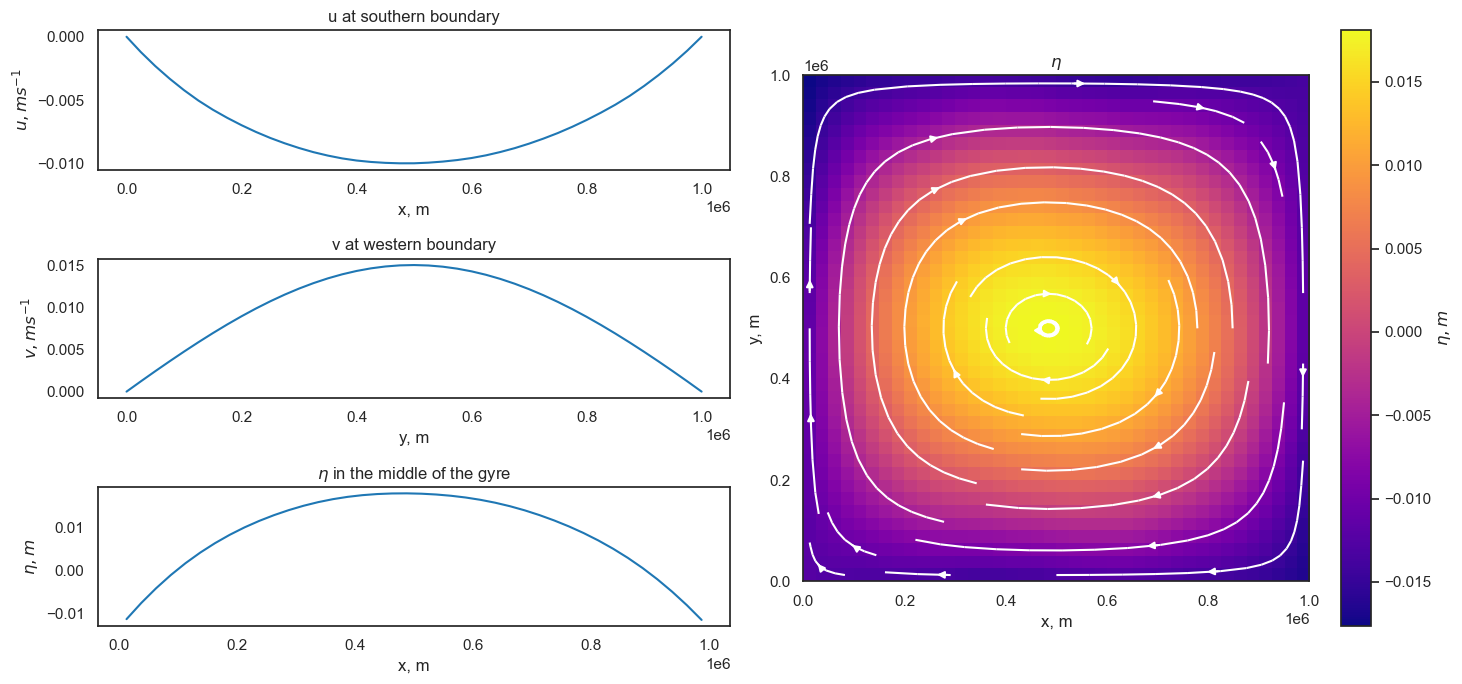

In [8]:
SL_1day()

Figure 8: The model was run using the Semi-Lagrangian method for 1 day, with $d = 25km$ and $\Delta t= 160s$. Left: Profiles of $u$, $v$ and $\eta$ at the southern boundary, western boundary and in the middle of the gyre respectively. Right: 2D plot of $\eta$ and the streamlines plotted over show that a clockwise gyre is forming,

### Steady State
The model using the Semi-Lagrangian scheme (SL) was run to 40 days such that it reached steady-state, and the same variables were plotted (Figure 9). While the signs of the profiles are the same, and a clockwise gyre with a western boundary current are observed, the solution deviates much more from the analytical solution than the Forward-Backward scheme. The magnitudes of $u$ at the southern boundary are smaller than the analytical solution in the western half of the domain, while the magnitudes of $v$ at the western boundary are smaller at all latitudes. $\eta$ in the middle of the gyre is less than the analytic solution for all $x$. From the plot of the $\eta$ field, the gyre appears to have become meridionally asymmetric, and is skewed slightly toward the north west corner of the domain. This is also reflected in the streamlines.

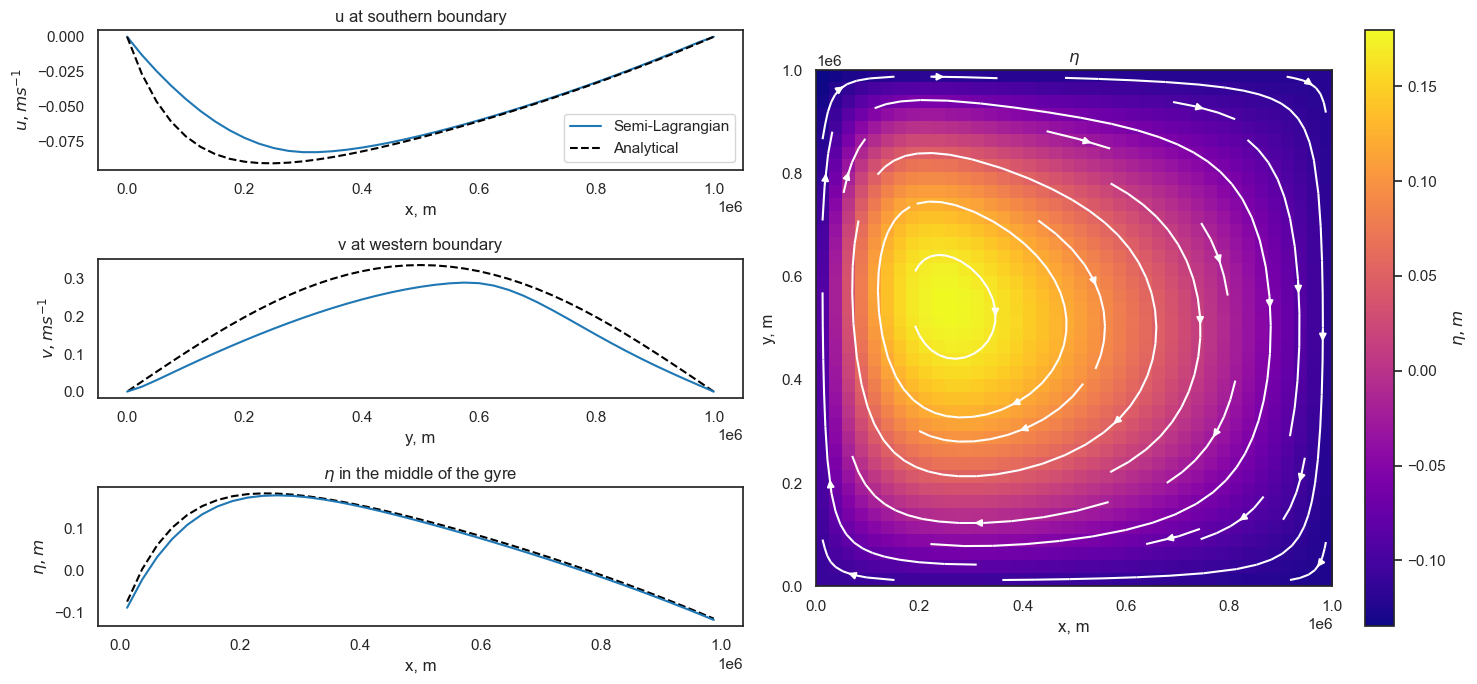

In [9]:
semi = SL_SS()

Figure 9: The model was run using the Semi-Lagrangian method for 40 days, until it was in a steady state, with $d = 25km$ and $\Delta t= 160s$. Left: Profiles of $u$, $v$ and $\eta$ at the southern boundary, western boundary and in the middle of the gyre respectively. Right: 2D plot of $\eta$ and the streamlines plotted over.

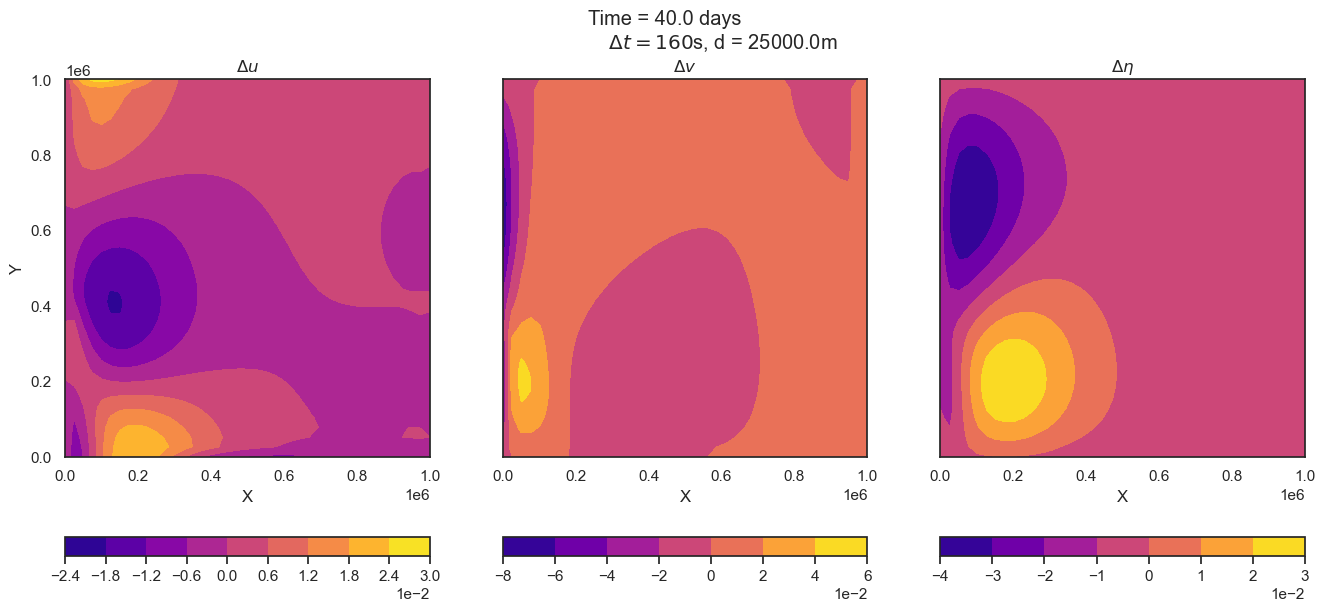

In [10]:
semi.plot_solution_diff()

Figure 10: $u$, $v$ and $\eta$ difference fields from the analytical solutions for the semi-lagrangian model.

### Deviations From Analytical Solution
To further investigate the properties of the semi-lagrangian scheme, the difference fields were plotted. In the $u$ difference field, there is a positive anomaly in the north west corner, a negative anomaly close to the centre of the gyre, and a positive anomaly at the southern boundary at $x = 0.2\times10^6m$. In the V field, there is a positive anomaly in the south west corner, and a negative anomaly on the northern half of the western boundary. In the $\eta$ difference fields, there are negative and positive anomalies in the northern and southern halfs of the western boundary respectively. These anomalies are not symmetrical, as they were in  FB. This is likely because the Semi-Lagrangian is able to feedback onto itself, resulting in these different anomalies.

The SL model's energy difference from the analytic solution was $8.52\times 10^{13}$J, more than 10 times that of the FB model, suggesting that it is performing worse. A contributor to this could be the adaptation made that does not include $S$ at the departure point, which could decrease the accuracy of the solution. Linear interpolation was also used to interpolate for values at the departure points, which could result in inaccuracies, since the field is not linear between the gridpoints

The SL model was found to be stable only for timesteps under the CFL maximum calculated above. This indicates that the SL model is a crude implementation of a SL time scheme, as it is meant to be unconditionally stable. This could also be contributing to the differences seen between the model solution and the analytical solution.

The SL model also took much longer to run than the FB model, likely due to the need for interpolation.

###  G5: Cubic Semi-Lagrangian: Steady State

To attempt to reduce the errors from interpolation, a semi lagrangian with cubic interpolation was also tried. This took a very long time (~20 hours) to run. Unfortunately, it did not improve the results as the variables fields, in particular the $\eta$ field, were not smooth, and are thus not realistic (Figure 11). This could be due to overfitting when using cubic interpolation. Aside from the jagged $\eta$, the solutions are similar to those of the linear SL model. From the difference fields (Figure 12), the overall trends are similar to those of the linear SL model, but with small bumps and troughs. The prevalance of the bumps and troughs appears to be greater in the eastern half of the domain. The energy difference from the analytical solution calculated was  $1.03\times 10^{14}$J, which is greater than that of the linear SL model. The reduced accuracy of the model, together with the long time it took to run, suggest that this implementation of the Semi-Lagrange scheme is not a sensible scheme to use for this problem. Due to the run times needed, I did not investigate the largest timestep that could be used for this scheme. An attempt using the a timestep just above the CFL maximum was performed, but was unstable, suggesting that like the linear SL model, the model is only stable for $\Delta t$ under the CFL maximum.

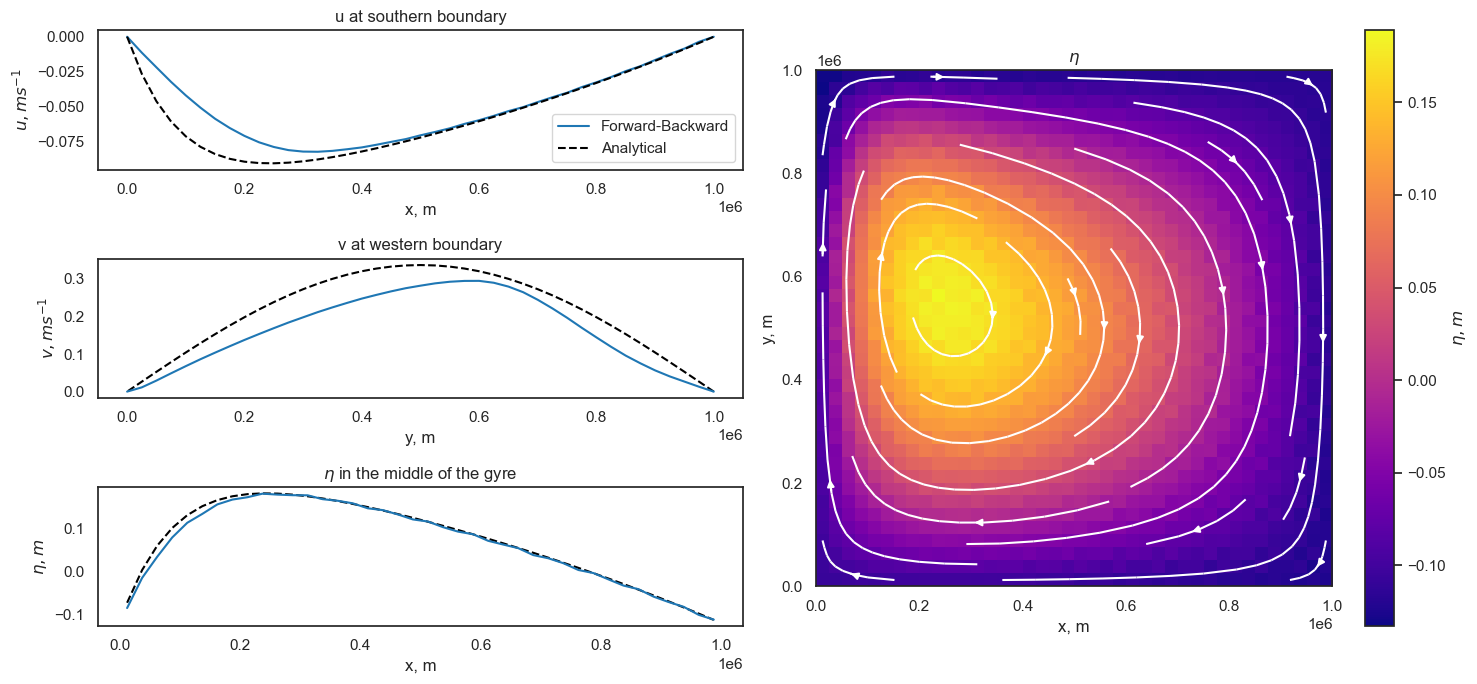

In [11]:
cubic = cubic_SL()

Figure 11: The model was run using the Semi-Lagrangian timescheme with cubic interpolation for 40 days, until it was in a steady state, with $d = 25km$ and $\Delta t= 160s$. Left: Profiles of $u$, $v$ and $\eta$ at the southern boundary, western boundary and in the middle of the gyre respectively. Right: 2D plot of $\eta$ and the streamlines plotted over. The plots show a clockwise (anti-cyclonic) gyre with a northward western boundary current.The $\eta$ field is not smooth. 

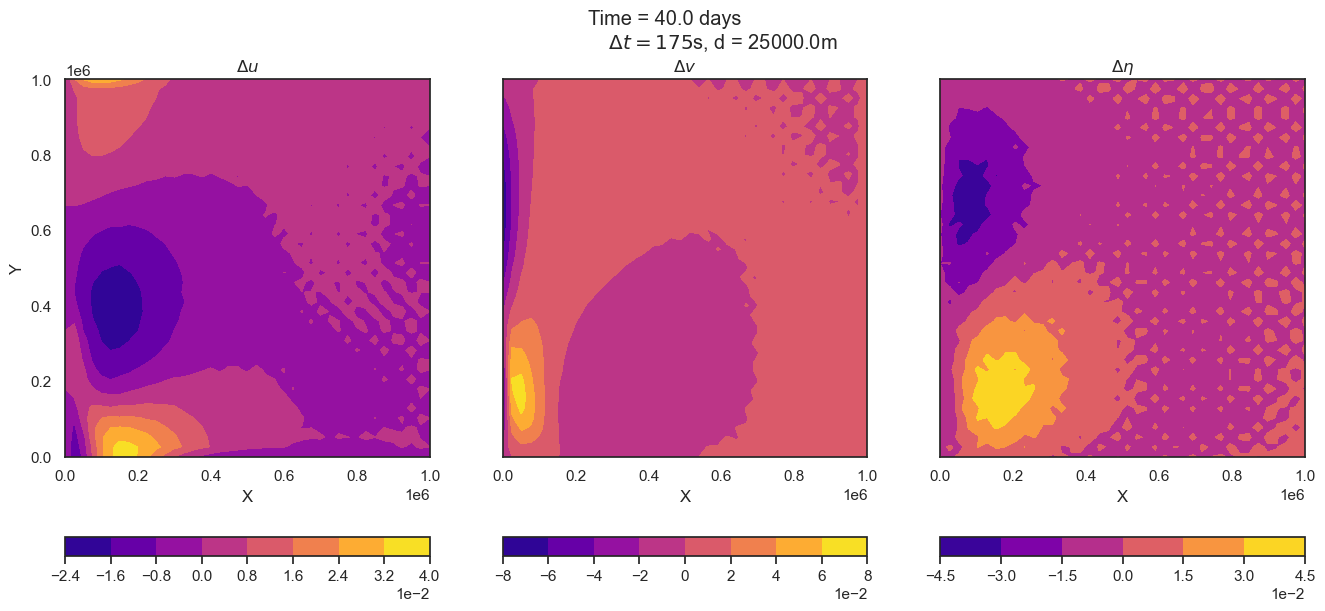

In [12]:
cubic.plot_solution_diff()

Figure 12: $u$, $v$ and $\eta$ difference fields from the analytical solutions for the cubic semi-lagrangian model.

## G4: Fourth Order Runge-Kutta

A model using the 4th order Runge-Kutta (RK4) time scheme was implemented, and the model was run to steady-state (40 days). Very similar to FB.

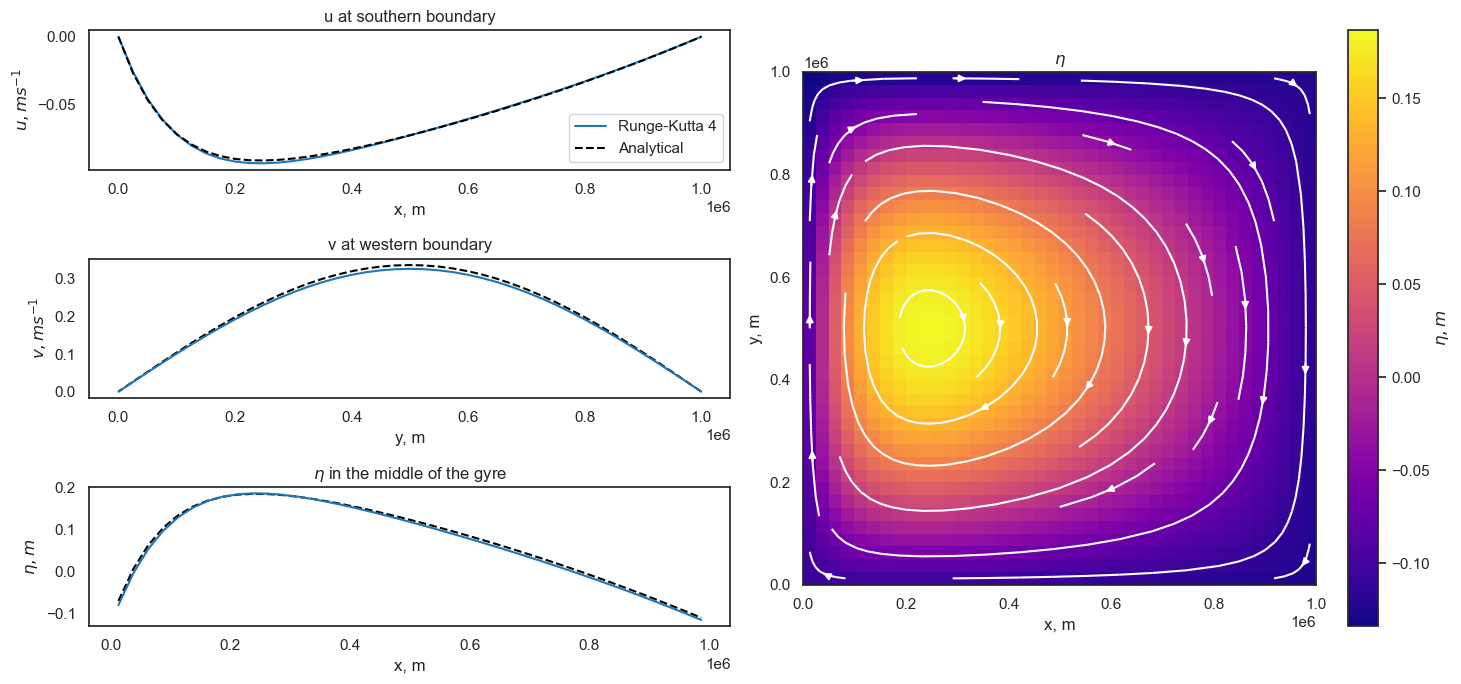

In [13]:
RK = RK4_SS()

Figure 13: The model was run using the fourth order Runge-Kutta timescheme for 40 days, until it was in a steady state, with $d = 25km$ and $\Delta t= 160s$. Left: Profiles of $u$, $v$ and $\eta$ at the southern boundary, western boundary and in the middle of the gyre respectively. Right: 2D plot of $\eta$ and the streamlines plotted over.

The $u$, $v$ and $\eta$ profiles, and $\eta$-field for the RK4 model are very similar to those of the FB model above. The difference fields were also plotted and were almost identical to those of the FB model. The only noticeable difference is that the contour in the bottom right corner of the $\Delta \eta$ plot is slighly smaller, and is more smooth. The $E\prime$ was calculated as $3.08\times10^{12}$J, very similar to that of the FB model. The similarities in the solution suggest that any errors are the result of the spatial discretisation and calculations in the model, and not the time schemes.

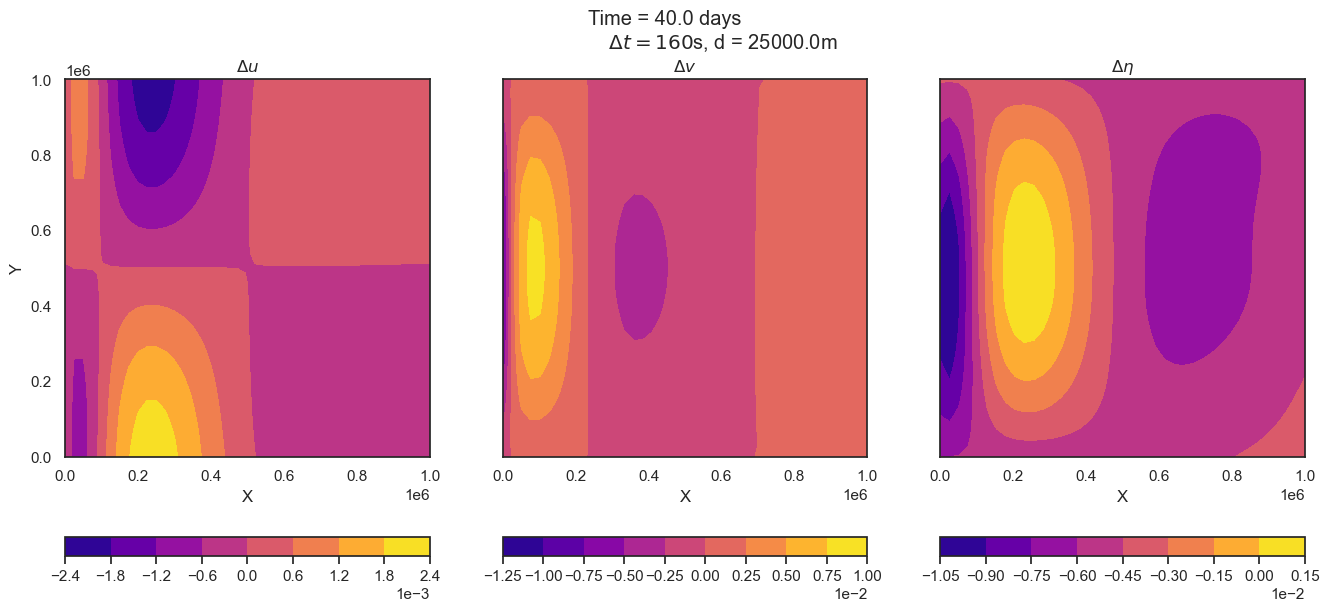

In [14]:
RK.plot_solution_diff()

Figure 14: Difference fields for $u$, $v$ and $\eta$ between the RK4 model solution and the analytical solution at a steady state.

The RK4 time scheme allowed for a slightly larger time step to be used, with a maximum of $\Delta t = 250s$, beyond which the solutions became unstable. To investigate $\Delta t$ affects the accuract of the solution, $E\prime$ was calculated for a range of $\Delta t$. $E\prime$ appeared to decrease with $\Delta t$ until $\Delta t = 220s$, then increased between $\Delta t = 220s$ and $\Delta t = 250s$. However, the differences between the various $E\prime$ were very small, and had a scale of approximately $0.1%$ of the $E\prime$ values. This suggests that any $\Delta t$ in the range plotted would be sensible to use, as it does not affect the accuracy of the solution significantly.  

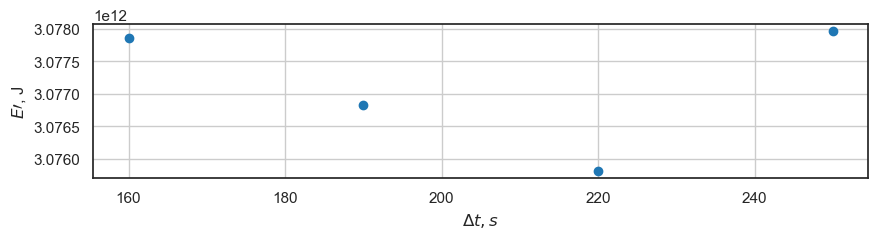

In [15]:
RK4_Ediffs()

Figure 15: $E\prime$ for a range of $\Delta t$ using the RK4 model. The difference between the various $E\prime$ is small. 

## Semi-Implicit Scheme

A Semi-Implicit (SI) time scheme, in which the gravity wave terms are treated implicitly, with the rest of the terms treated explicitly was implemented. A more detailed explanation of the implementation can be found in the appendix. This was run to steady-state (40 days), and the variable profiles as well as the $\eta$ field is shown in Figure 16. 

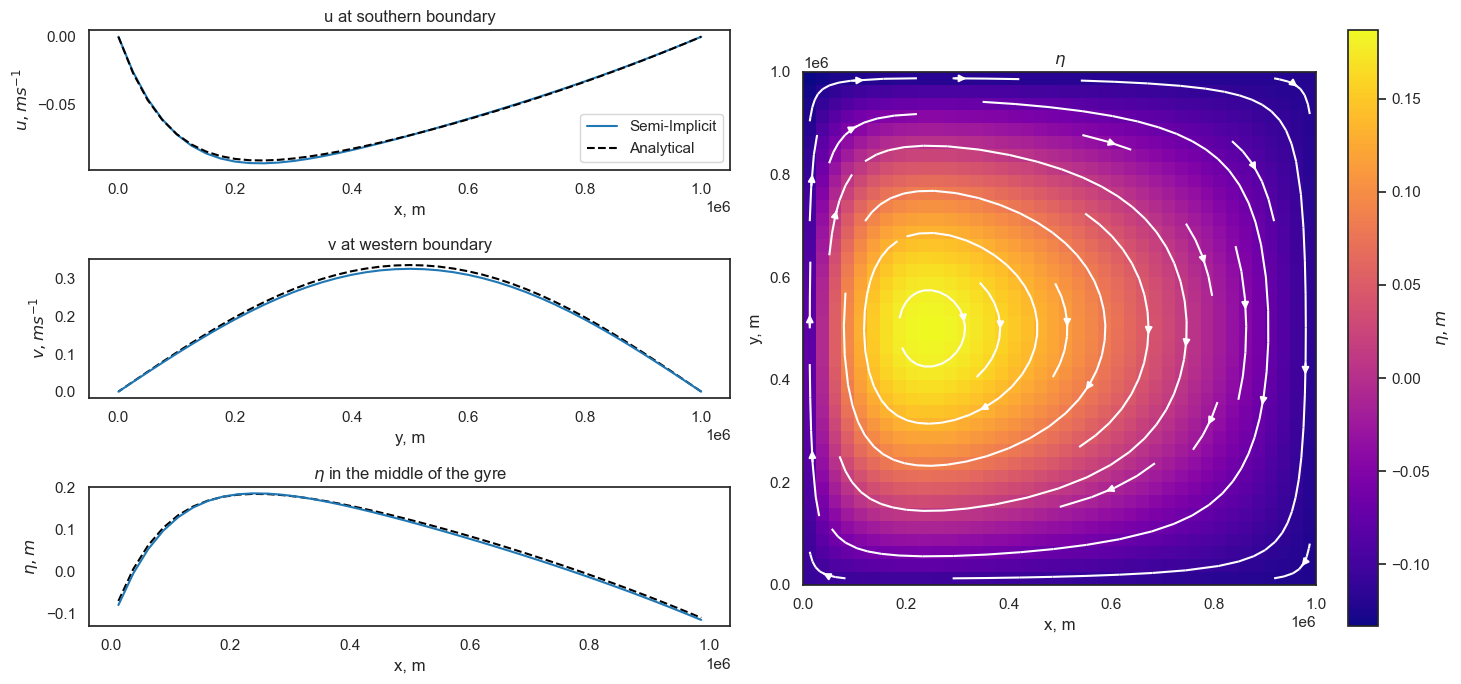

In [16]:
SemiI = SI_SS()

Figure 16: The model was run using the Semi-Implicit timescheme for 40 days, until it was in a steady state, with $d = 25km$ and $\Delta t= 160s$. Left: Profiles of $u$, $v$ and $\eta$ at the southern boundary, western boundary and in the middle of the gyre respectively. Right: 2D plot of $\eta$ and the streamlines plotted over. The plots show a clockwise (anti-cyclonic) gyre with a northward western boundary current.

The profiles for $u$ at the southern boundary, $v$ at the western boundary, and $\eta$ in the middle of the gyre, as well as the $\eta$ field, appear very similar to those of the FB model, and are very close to the analytical solution. The difference fields were also plotted, and while they look similar to the FB and RK4 models, it is more symmetrical in the y-direction. $E\prime$ was calculated to be $3.07\times10^{12}$J, very close to that of the FB and RK4 models. To investigate the impact of $\Delta t$ on the accuracy of the solution, $E\prime$ was calculated for a range of $\Delta t$. While the Semi-Implicit model does not have a specific $\Delta t$ after which the solution becomes unstable, very large timesteps appeared to result in the solution deviating from the solution expected at the steady state. Visually, this began at $\Delta t = 6 days$. I thus varied $\Delta t$ between 16s and 5 days. From Figure 18, $E\prime$ decreases with $\Delta t$ until about 3 days,  after which it increases rapidly. 3 days is thus the maximum sensible timestep. The minimum $E\prime$ was $2.07\times 10^{12}$ J, about two-thirds of $E\prime$ calculated for the FB and RK4 model.

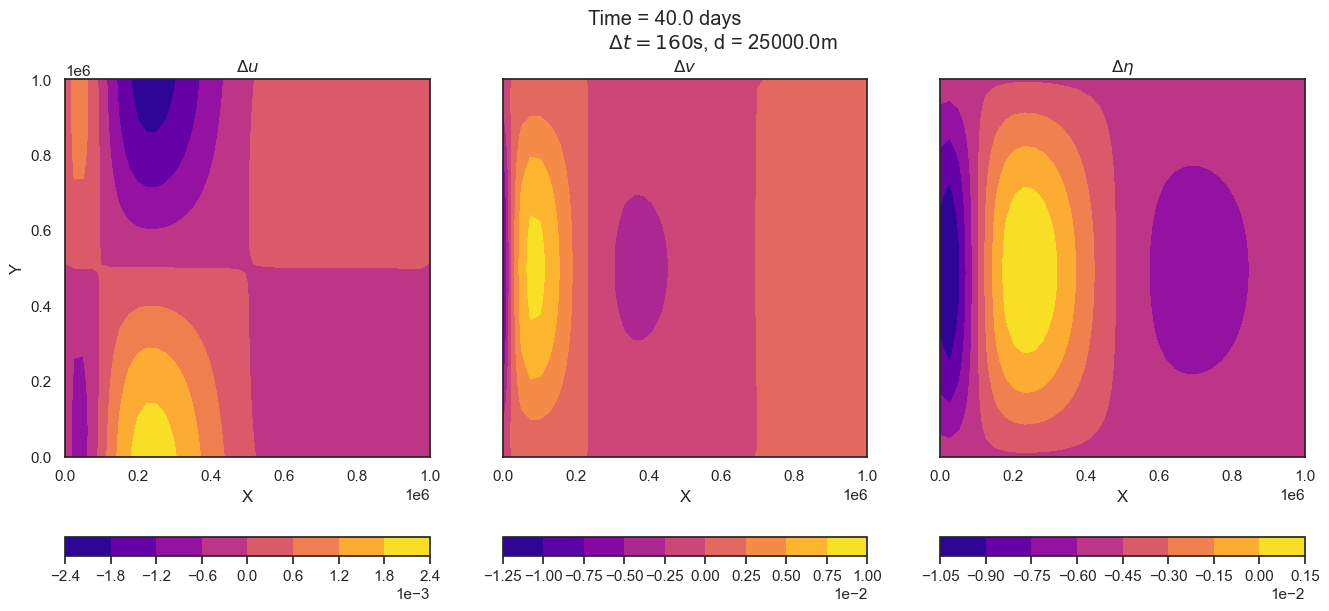

In [17]:
SemiI.plot_solution_diff()

Figure 17: Difference fields for $u$, $v$ and $\eta$ between the Semi-Implicit model solution and the analytical solution at a steady state.

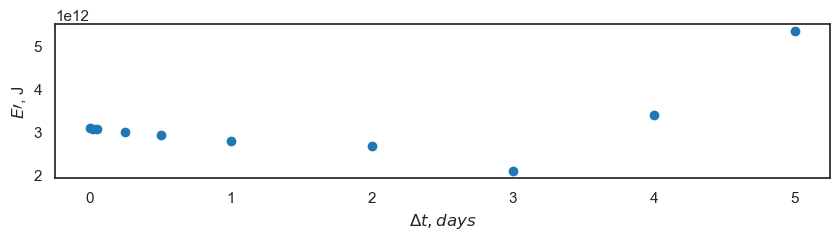

In [18]:
semi_ediffs()

Figure 18: $E\prime$ for a range of $\Delta t$ using the RK4 model. $E\prime$ decreases with $\Delta t$ until $\Delta t = 3 $ days, then increases with $\Delta t$. 

## Comparison of Time Schemes

To find out which time scheme is most suitable for the problem at hand, I compared the accuracy ($E\prime$) and runtime of the various time schemes using the largest sensible time step. The values are listed in Table 1. The Semi-Implicit (SI) model was quickest to run, and the most accurate, followed by FB, RK4 and finally, SL. The Semi-Implicit could take longer to run if the resolution needs to be increased, as much of the runtime is spent inversing the $\ell$-matrix, which is computationally more expensive for larger matrices. However, this only has to be done once, and combined with the possibility of much larger timesteps, the Semi-Implicit is the most suitable time scheme out of the four time-schemes presented, for the problem at hand.

In [19]:
max_timesteps()

,Maximum Timestep,"Runtime, s",Energy Difference
FB,173s,2.479647,3.067814e+12
SL,176s,64.925700,8.517716e+13
RK4,250s,7.440430,3.077961e+12
SI,3 days,0.258621,2.072794e+12


Table 1: Maximum $\Delta t$, runtime and $E\prime$ for each time scheme.

## References
Matsuno, T. (1966). Numerical simulation of the primitive equations by a simulated backward difference method. J. Meteorol. Soc. Japan, 44, 76–84.

Mushgrave, D. (1985). A numerical study of the roles of subgyre-scale mixing and the western boundary current on homogenisation of a passive tracer. J. Geophys. Res., 90, 7037–7043.

Stommel, H. (1948). The westward intensification of wind-driven ocean currents. Trans. Am. Geophys. Union, 29, 202–206.

Tailleux, R. (2024). Wind-Driven Circulation Western Boundary Currents. Oceanography Lecture 8, 4-19.

## Appendix

### Unstable with $\Delta t < \Delta t_{max}$

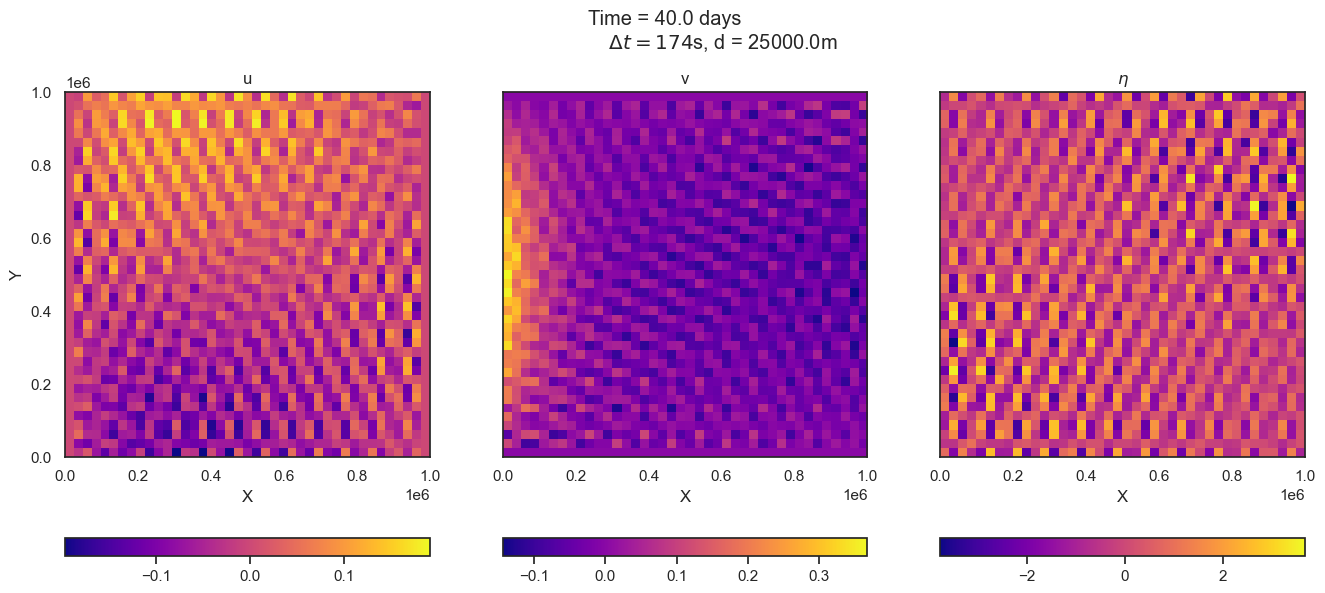

In [20]:
FB_unstable()

Figure 19: The solutions at 40 days using the FB model with $\Delta t = 174s$ is unstable, despite this being under the CFL maximum.

### Semi-Implicit 

Following from the Semi-Implicit example in the lecture notes,
but using a forward difference scheme for time instead of leapfrog,
\begin{equation}
u^{n+1} + g\Delta t \frac{\partial \eta^{n+1}}{\partial x} = u^n + \Delta t \left( fv^n - \gamma u^n + \frac{\tau_x}{\rho H} \right) = A,
\end{equation}

\begin{equation}
v^{n+1} + g\Delta t \frac{\partial \eta^{n+1}}{\partial y} = v^n + \Delta t \left( - fu^n - \gamma v^n + \frac{\tau_y}{\rho H} \right) = B,
\end{equation}

\begin{equation}
\eta^{n+1} + H\Delta t \left( \frac{\partial u^{n+1}}{\partial x} + \frac{\partial v^{n+1}}{\partial y} \right) = \eta^n = C.
\end{equation}

$\eta^{n+1}$ can thus be found using a matrix equation, since
\begin{equation}
    \ell \eta^{n+1} = F
\end{equation}
where 
\begin{equation}
\ell =  1 - gH\Delta t^2 \left(\frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2}\right) 
\end{equation}
and
\begin{equation}
F = C - \Delta t H\left(\frac{\partial A}{\partial x} + \frac{\partial B}{\partial y}\right).
\end{equation}

We can thus calculate $\eta^{n+1}$ by inverting the $\ell$ matrix and multiplying it with F.
\begin{equation}
    \eta^{n+1} = \ell^{-1}F.
\end{equation}

The $\eta$ matrix was collaspsed into a 1 by $N\times N$ matrix, with the columns stacked on top of each other, and the $\ell$ matrix was set up as shown below for a simplified case, where $\frac{L}{d} = 5$.

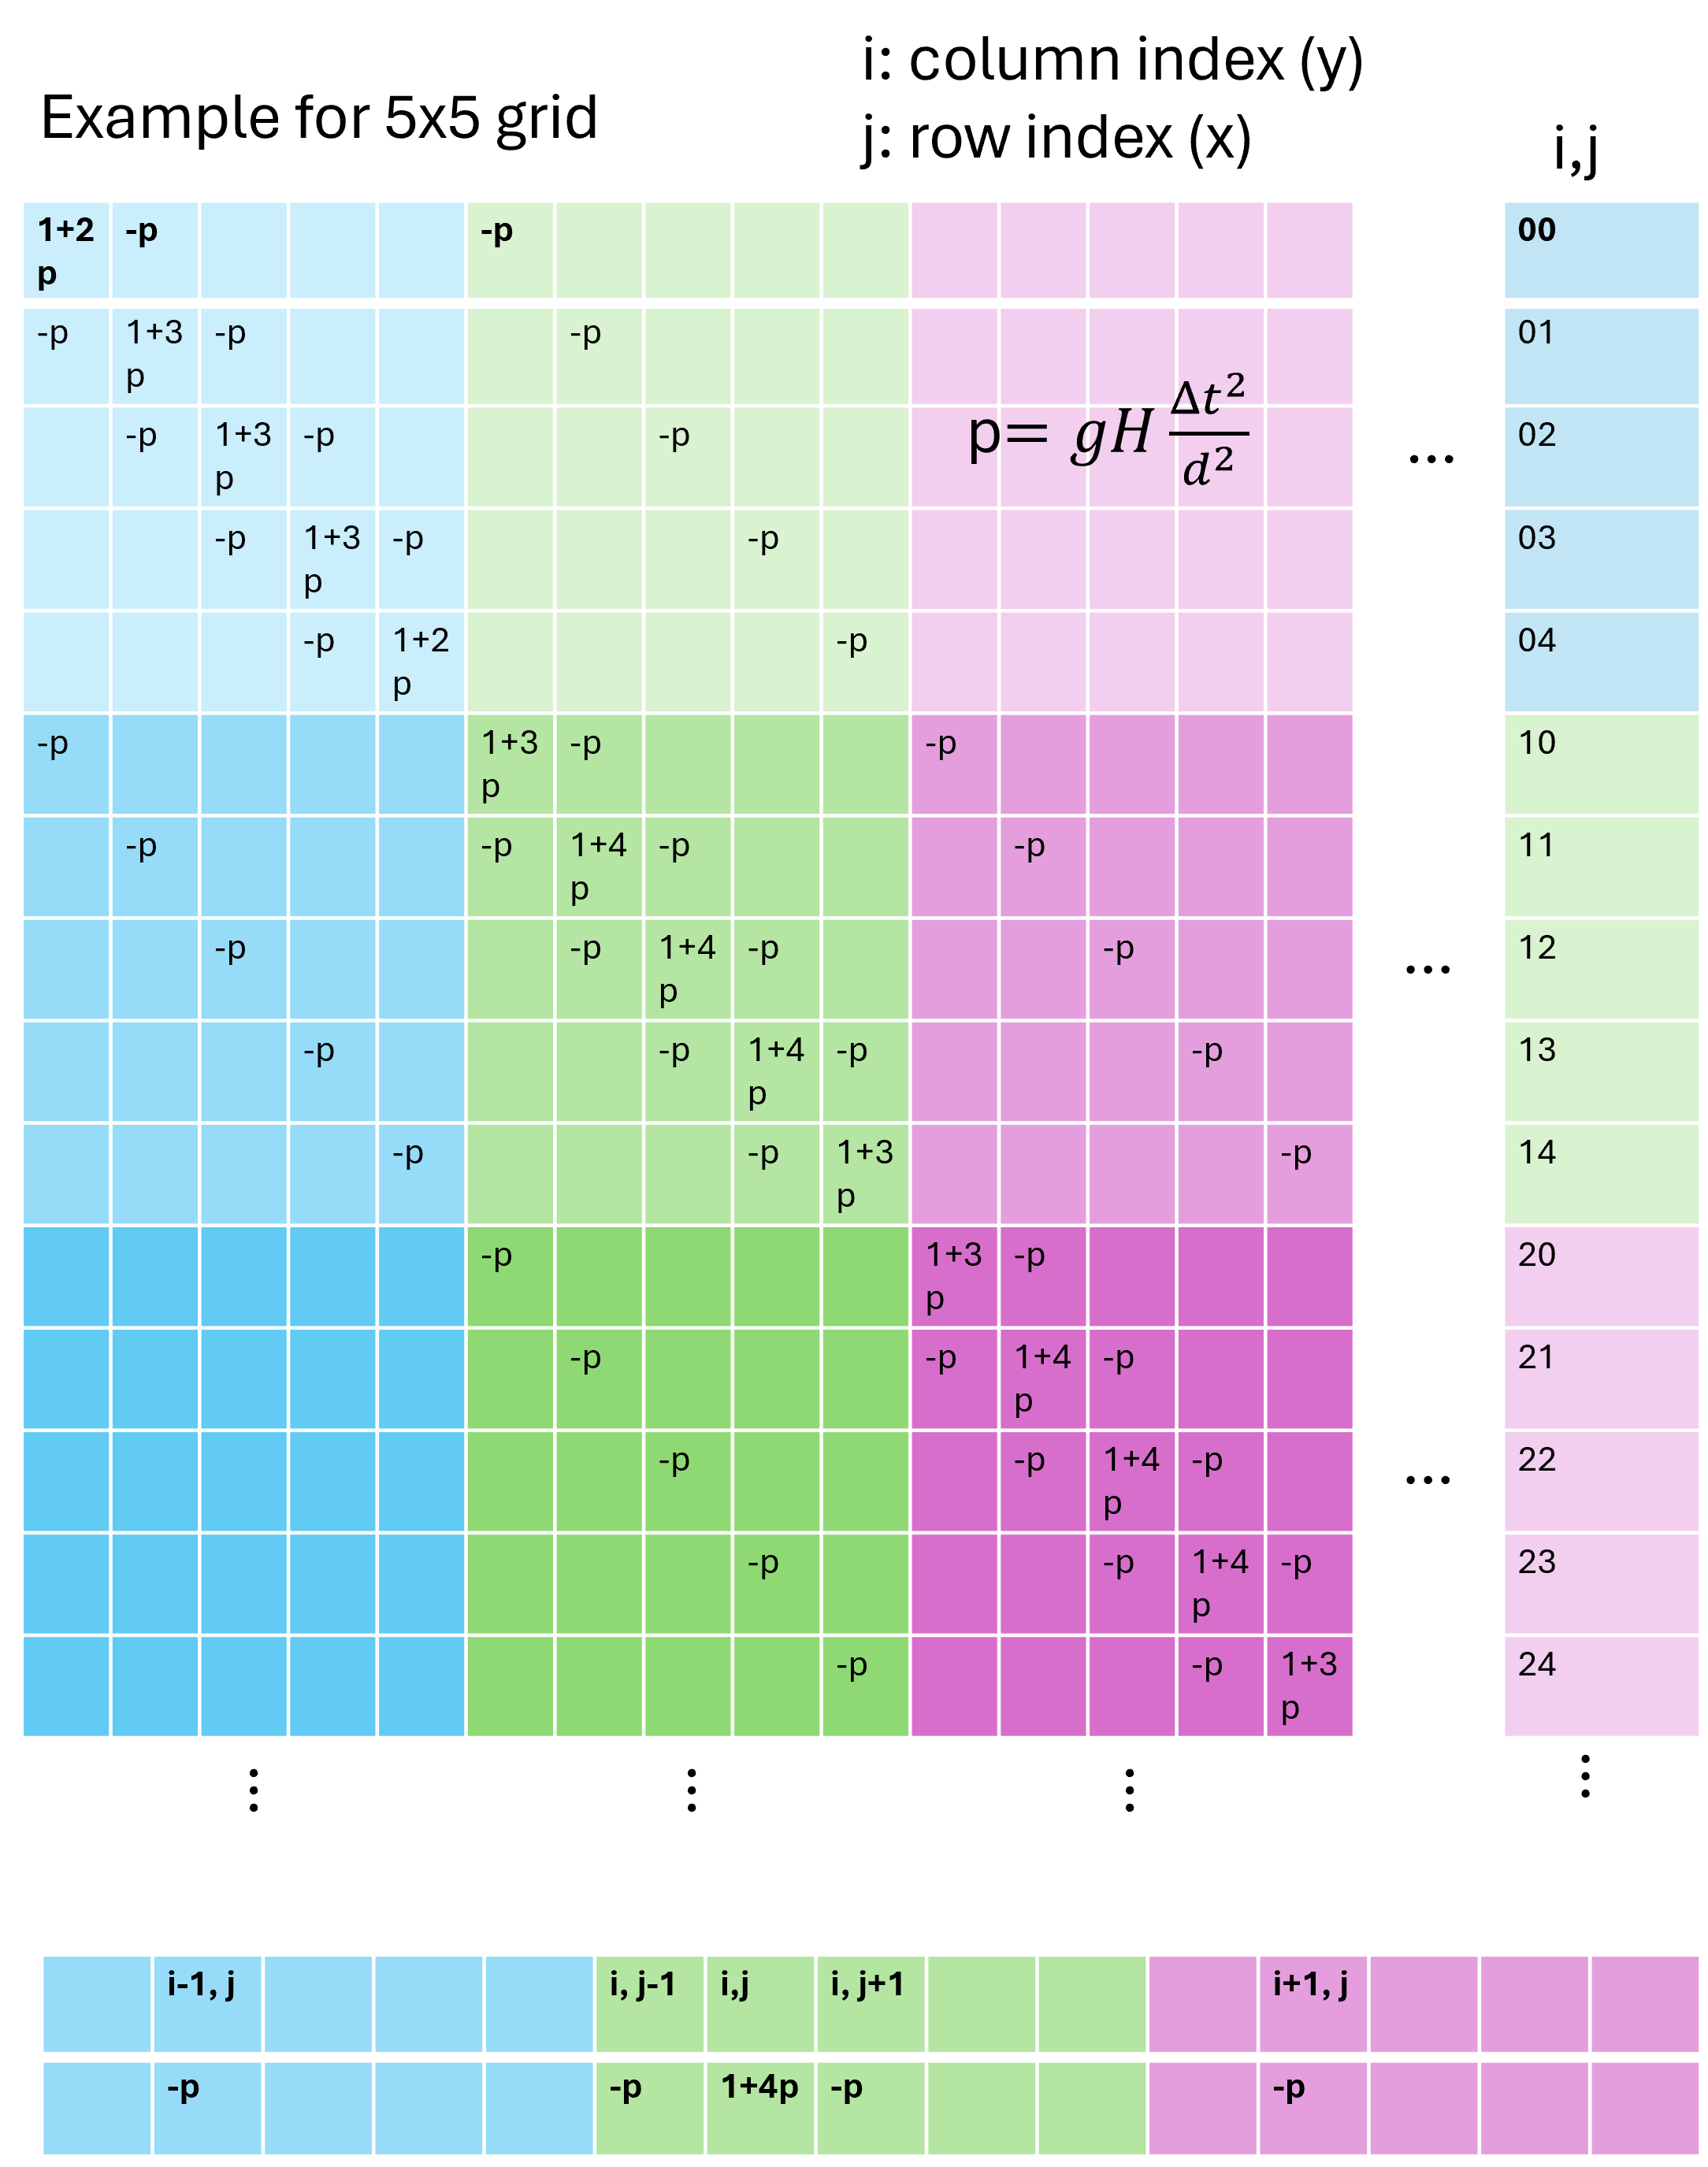

Figure 20: Top left corner of the $\ell$ matrix for a $5\times5$ grid.